<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 190.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 191.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 147.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 158.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 183.9 MB/s eta 0:00:00


##### Import Necessary Modules:


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [40]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly

print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [41]:
## Write your code here
##print(df.info())
print(df.describe(include="all"))
##print(df.describe(include="object"))

          ResponseId                      MainBranch              Age  \
count   65437.000000                           65437            65437   
unique           NaN                               5                8   
top              NaN  I am a developer by profession  25-34 years old   
freq             NaN                           50207            23911   
mean    32719.000000                             NaN              NaN   
std     18890.179119                             NaN              NaN   
min         1.000000                             NaN              NaN   
25%     16360.000000                             NaN              NaN   
50%     32719.000000                             NaN              NaN   
75%     49078.000000                             NaN              NaN   
max     65437.000000                             NaN              NaN   

                 Employment                            RemoteWork   Check  \
count                 65437                   

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [42]:
## Write your code here
missing_counts = df.isna().sum()
##print(missing_counts)
df[df.isna().any(axis=1)]
missing_summary = pd.DataFrame({
    "Missing_Count": df.isna().sum(),
    "Missing_Percent": (df.isna().mean() * 100).round(2)
})

missing_summary_sorted = missing_summary.sort_values(
    by="Missing_Count",
    ascending=False
)

missing_summary_sorted
columns_with_missing = missing_summary_sorted[
    missing_summary_sorted["Missing_Count"] > 0
]

with pd.option_context("display.max_rows", None):
    print(columns_with_missing)

                                Missing_Count  Missing_Percent
AINextMuch less integrated              64289            98.25
AINextLess integrated                   63082            96.40
AINextNo change                         52939            80.90
AINextMuch more integrated              51999            79.46
EmbeddedAdmired                         48704            74.43
EmbeddedWantToWorkWith                  47837            73.10
EmbeddedHaveWorkedWith                  43223            66.05
ConvertedCompYearly                     42002            64.19
AIToolNot interested in Using           41023            62.69
AINextMore integrated                   41009            62.67
Knowledge_9                             37802            57.77
Frequency_3                             37727            57.65
Knowledge_8                             37679            57.58
ProfessionalTech                        37673            57.57
Knowledge_7                             37659          

##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



                            Missing_Count  Missing_Percent
AINextMuch less integrated          64289            98.25
AINextLess integrated               63082            96.40
AINextNo change                     52939            80.90
AINextMuch more integrated          51999            79.46
EmbeddedAdmired                     48704            74.43
Index(['AINextMuch less integrated', 'AINextLess integrated',
       'AINextNo change', 'AINextMuch more integrated', 'EmbeddedAdmired'],
      dtype='object')


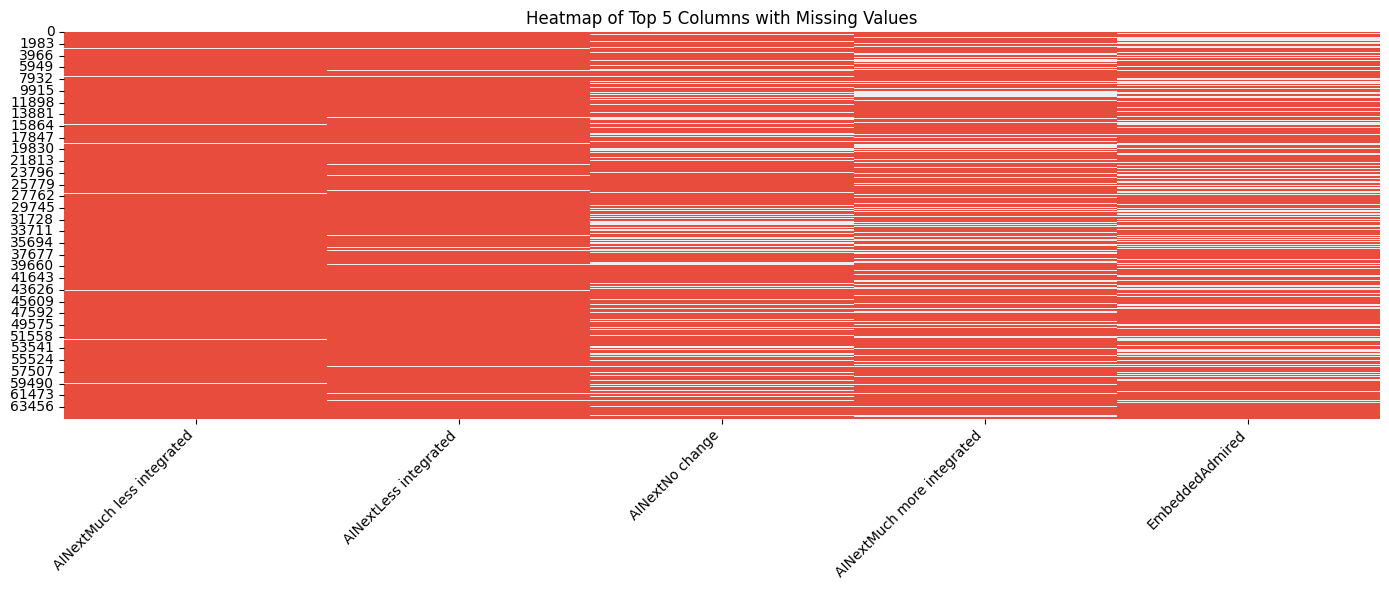

In [10]:
## Write your code here
missing_counts = df.isna().sum()
##print(missing_counts)
df[df.isna().any(axis=1)]
missing_summary = pd.DataFrame({
    "Missing_Count": df.isna().sum(),
    "Missing_Percent": (df.isna().mean() * 100).round(2)
})

missing_summary_sorted = missing_summary.sort_values(
    by="Missing_Count",
    ascending=False
)

missing_summary_sorted
columns_with_missing = missing_summary_sorted[
    missing_summary_sorted["Missing_Count"] > 0
]


most_missing_column = missing_summary_sorted.idxmax()["Missing_Count"]
most_missing_column
top_missing_columns = missing_summary_sorted.head(5)
top5_cols = missing_summary_sorted.head(5).index
print(top_missing_columns)
print(top5_cols)

plt.figure(figsize=(14, 6))
sns.heatmap(
    df[top5_cols].isna(),
    cbar=False,
    cmap=["#ecf0f1", "#e74c3c"]  # optional: present vs missing
)
plt.title("Heatmap of Top 5 Columns with Missing Values")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [14]:
## Write your code here
print("Total rows with null values in ConvertedCompYearly column:",df["ConvertedCompYearly"].isna().sum())

Total rows with null values in ConvertedCompYearly column: 42002


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [38]:
## Write your code here
most_frequent_emp = df["Employment"].mode()[0]
print("Most frequent value:", most_frequent_emp)

Most frequent value: Employed, full-time


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [39]:
## Write your code here
df["Employment_Imputed"] = df["Employment"].fillna(most_frequent_emp)
print(df["Employment"].head())
print(df["Employment_Imputed"].head())

0    Employed, full-time
1    Employed, full-time
2    Employed, full-time
3     Student, full-time
4     Student, full-time
Name: Employment, dtype: object
0    Employed, full-time
1    Employed, full-time
2    Employed, full-time
3     Student, full-time
4     Student, full-time
Name: Employment_Imputed, dtype: object


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


/tmp/ipykernel_300/2194847815.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[Employment_original] = df["Employment"]
/tmp/ipykernel_300/2194847815.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[Employment_original] = df["Employment"]
/tmp/ipykernel_300/2194847815.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, u

0        Employed, full-time
1        Employed, full-time
2        Employed, full-time
3         Student, full-time
4         Student, full-time
                ...         
65432    Employed, full-time
65433    Employed, full-time
65434    Employed, full-time
65435    Employed, full-time
65436     Student, full-time
Name: Employment, Length: 65437, dtype: object


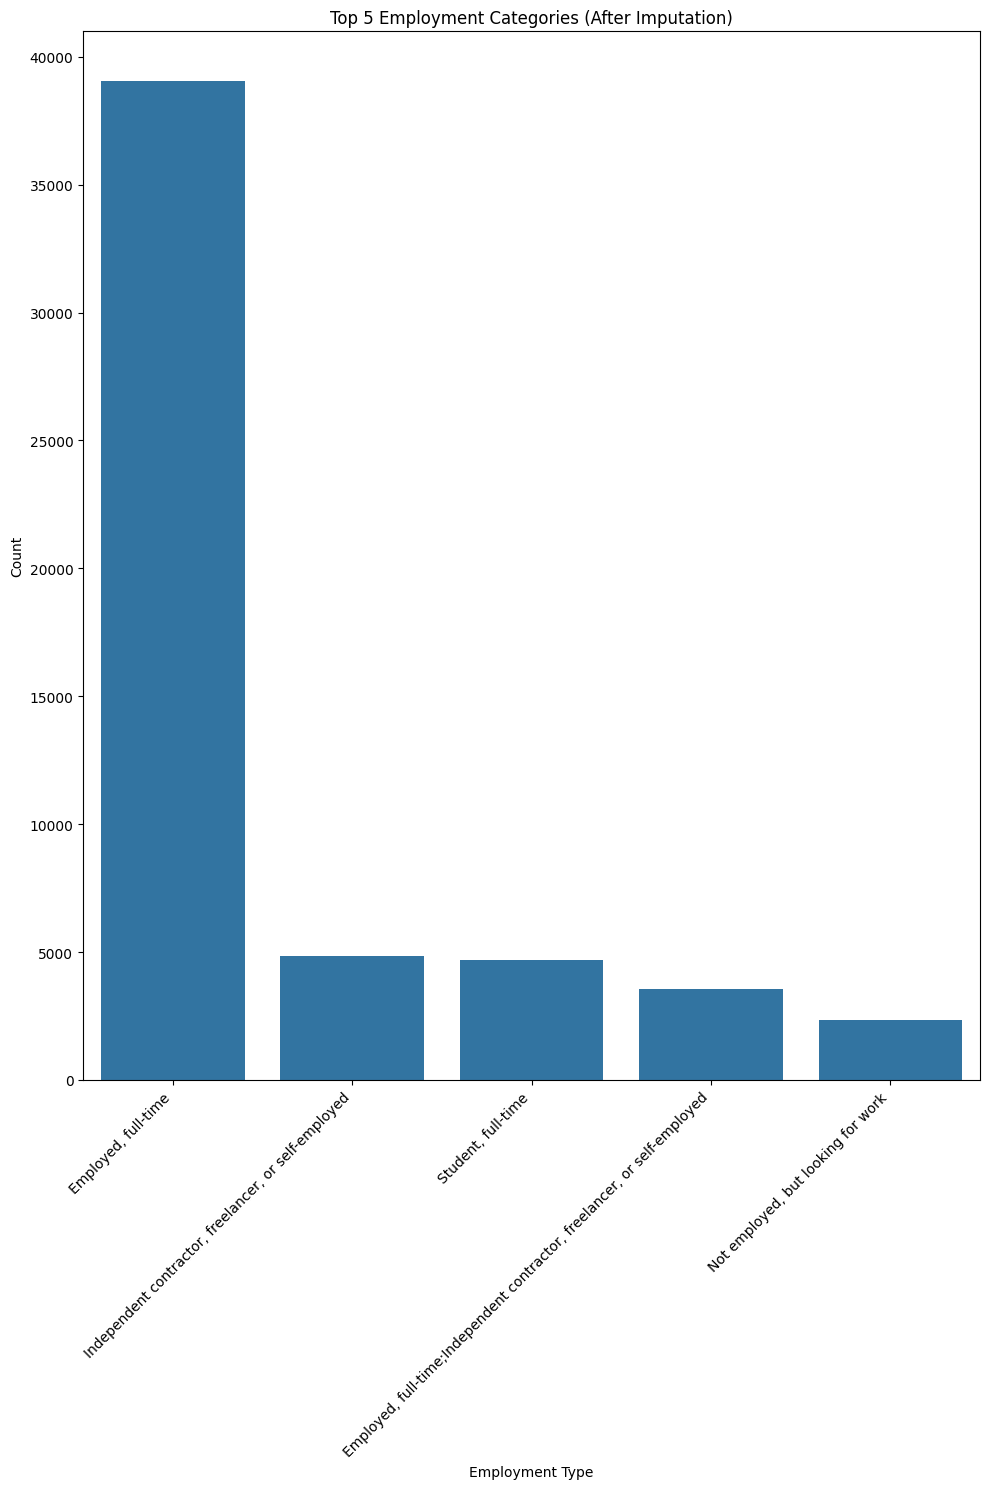

In [34]:
## Write your code here
top5_employment = df["Employment"].value_counts().head(5).index
df_top5 = df[df["Employment"].isin(top5_employment)]

most_frequent_emp = df["Employment"].mode()[0]
df["Employment"] = df["Employment"].fillna(most_frequent_emp)

plt.figure(figsize=(10, 15))
sns.countplot(
    data=df_top5,
    x="Employment",
    order=top5_employment
)
plt.title("Top 5 Employment Categories (After Imputation)")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
